K-Means

라이브러리 준비

In [1]:
from os import name, sep
import matplotlib
from nltk import metrics, tokenize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

데이터 읽어오기

In [2]:
df = pd.read_csv("C:/Users/User/OneDrive - 공주대학교/바탕 화면/review/맞춤법 정리(리뷰, 레이블).csv", encoding='cp949')

train_x = df['리뷰']

형태소 분리 및 TF-IDF

In [3]:
okt = Okt()
print(train_x[4])
print(okt.morphs(train_x[4]))

#tf-idf
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_df=0.9, tokenizer=okt.morphs, token_pattern=None)
tfidf.fit(train_x.values.astype('U'))
train_x_okt = tfidf.transform(train_x.values.astype('U'))
vector = tfidf.transform(train_x.values.astype('U')).toarray()

순두부찌개는 너무 짠맛만 나고.. 물 넣어서 전자레인지 돌려먹었어요 그냥 딱 쉰 김치 국물에 순두부에요 제육덮밥도.. 제가 리뷰만 너무 믿었나요 윤기 1도 없고 그냥 퍽퍽 그 자체에요 반찬도 참다 참다 쉰내가 너무 나서 말씀드렸더니 쉰 김치냄새 때문에 그렇다 먹어도 이상 없다 하시는데 제가 거기서 더 이상 뭔 얘길 하나요~ 진심 두 입씩 먹고 다 안 먹었습니다 .. 양은 많네요
['순두부찌개', '는', '너무', '짠맛', '만', '나고', '..', '물', '넣어서', '전자레인지', '돌려', '먹었어요', '그냥', '딱', '쉰', '김치', '국물', '에', '순두부', '에요', '제육', '덮', '밥', '도', '..', '제', '가', '리뷰', '만', '너무', '믿었나요', '윤기', '1', '도', '없고', '그냥', '퍽퍽', '그', '자체', '에요', '반찬', '도', '참다', '참다', '쉰내', '가', '너무', '나서', '말씀드렸더니', '쉰', '김치', '냄새', '때문', '에', '그렇다', '먹어도', '이상', '없다', '하시는데', '제', '가', '거기', '서', '더', '이상', '뭔', '얘길', '하나요', '~', '진심', '두', '입', '씩', '먹고', '다', '안', '먹었습니다', '..', '양은', '많네요']


elbow

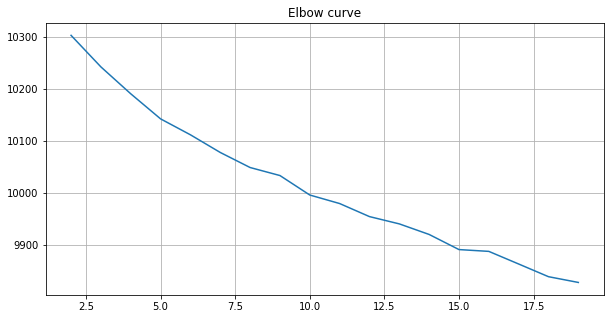

In [4]:
#elbow curve
distortions = []
vector = pd.DataFrame(vector)
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(vector)
    distortions.append(kmeans.inertia_)

fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, 20), distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

차원 축소

In [5]:
pca = PCA(n_components=2)
vector = pca.fit_transform(vector)
vector.shape

(10658, 2)

모델 만들기 및 시각화

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


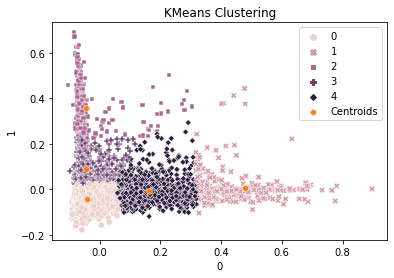

Silhouette Coefficient: 0.5533
Davies Bouldin Index: 0.6319


In [6]:

model = KMeans(n_clusters=5, init='k-means++')

vector = pd.DataFrame(vector)

cluster = model.fit(vector)

cluster_id = pd.DataFrame(cluster.labels_)


d1 = pd.DataFrame()
d1 = pd.concat([vector, cluster_id], axis=1)
d1.columns = [0,1,"cluster"]


#시각화
sns.scatterplot(d1[0], d1[1], hue=d1['cluster'], style=d1['cluster'], legend="full")
sns.scatterplot(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label = 'Centroids')
plt.title('KMeans Clustering')
plt.legend()
plt.show()

print('Silhouette Coefficient: {:.4f}'.format(silhouette_score(d1.iloc[:,:-1], d1['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(davies_bouldin_score(d1.iloc[:,:-1], d1['cluster'])))

plt.clf()
plt.close()


파일에 저장

In [7]:
f = open('C:/Users/User/OneDrive - 공주대학교/바탕 화면/review/result_kmeans_ver1.txt',mode='w', encoding='utf-8' )

for cluster_num in set(cluster_id):
    f.write("cluster num : {} \n".format(cluster_num))
    temp_df = df[df['result'] == cluster_num]
    for review in temp_df['리뷰']:
        f.write("{}".format(review))
        f.write('\n')

f.close

<function TextIOWrapper.close()>